In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### kaggle data link

#https://www.kaggle.com/code/graisybiswal/demand-forecasting-in-supply-chain-analytics

In [2]:
df = pd.read_csv("D:\\supply_chin_inventory_management\\data\\demand-forecasting-kernels-only\\train.csv")
print(df.shape)
df.head()

(913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df['store'].nunique()

10

In [5]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [6]:
df['item'].nunique()

50

In [7]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.isocalendar().year

In [20]:
df_grp = df.groupby(['year','week','item'])['sales'].sum().reset_index()
df_grp

,year,week,item,sales
0,2013,1,1,802
1,2013,1,2,2067
2,2013,1,3,1259
3,2013,1,4,734
4,2013,1,5,593
...,...,...,...,...
13045,2017,52,46,3583
13046,2017,52,47,1334
13047,2017,52,48,3038
13048,2017,52,49,1727


In [30]:
df1 = df_grp[df_grp['item']==1]
df1.rename(columns={'sales':'sales_1', }, inplace=True)
df1.drop('item', axis=1, inplace=True)
df2 = df_grp[df_grp['item']==2]
df2.rename(columns={'sales':'sales_2'}, inplace=True)
df2.drop('item', axis=1, inplace=True)

C:\Users\ajit.mishra\AppData\Local\Temp\ipykernel_6488\1879869060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'sales':'sales_1', }, inplace=True)
C:\Users\ajit.mishra\AppData\Local\Temp\ipykernel_6488\1879869060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('item', axis=1, inplace=True)
C:\Users\ajit.mishra\AppData\Local\Temp\ipykernel_6488\1879869060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [46]:
df_final = pd.merge(df1,df2,on=['year', 'week'])
df_final['cum_week'] = [i for i in range(1,262)]
df_final

,year,week,sales_1,sales_2,cum_week
0,2013,1,802,2067,1
1,2013,2,863,2350,2
2,2013,3,865,2427,3
3,2013,4,799,2329,4
4,2013,5,954,2414,5
...,...,...,...,...,...
256,2017,48,1549,4248,257
257,2017,49,1288,3494,258
258,2017,50,1300,3536,259
259,2017,51,1284,3397,260


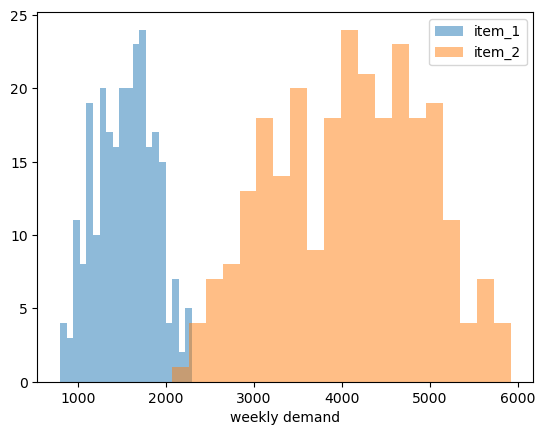

In [64]:
plt.hist(df_final['sales_1'], bins=20, label='item_1', alpha=0.5)
plt.hist(df_final['sales_2'], bins=20, label='item_2', alpha=0.5)
plt.xlabel('weekly demand')
plt.legend()
plt.show()

In [77]:
df_final[['sales_1', 'sales_2']].describe()

,sales_1,sales_2
count,261.000000,261.000000
mean,1537.869732,4097.946360
std,329.853182,850.621337
min,799.000000,2067.000000
25%,1284.000000,3419.000000
50%,1560.000000,4155.000000
75%,1779.000000,4737.000000
max,2298.000000,5920.000000


In [ ]:
plt.hist(df_final['sales_1'], bins=20)
plt.show()

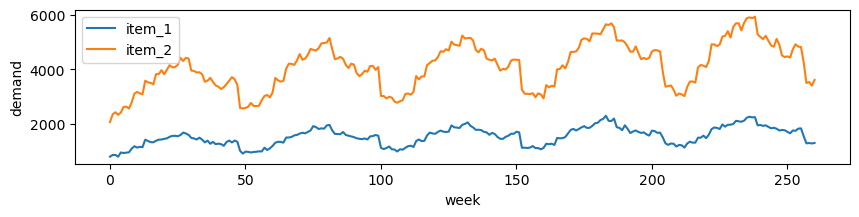

In [62]:
plt.figure(figsize=[10,2])
sns.lineplot(df_final['sales_1'], label='item_1')
sns.lineplot(df_final['sales_2'], label='item_2')
plt.xlabel('week')
plt.ylabel('demand')
plt.legend()

plt.show()

In [75]:
df_final['demand'] = df_final[['sales_1', 'sales_2']].values.tolist()
df_final

,year,week,sales_1,sales_2,cum_week,demand
0,2013,1,802,2067,1,"[802, 2067]"
1,2013,2,863,2350,2,"[863, 2350]"
2,2013,3,865,2427,3,"[865, 2427]"
3,2013,4,799,2329,4,"[799, 2329]"
4,2013,5,954,2414,5,"[954, 2414]"
...,...,...,...,...,...,...
256,2017,48,1549,4248,257,"[1549, 4248]"
257,2017,49,1288,3494,258,"[1288, 3494]"
258,2017,50,1300,3536,259,"[1300, 3536]"
259,2017,51,1284,3397,260,"[1284, 3397]"


In [76]:
df_final.to_csv('D:\\supply_chin_inventory_management\\data\\kaggle_multi_item_data.csv', index=False)